<a href="https://colab.research.google.com/github/amikoshimrah/Deployment/blob/main/LSTM_and_GRU_Assignmentipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Import Libraries**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense,GRU
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

**2. Load and Preprocess Data**

In [ ]:
# Upload file via Colab uploader
from google.colab import files
uploaded = files.upload()

# Load and clean text
with open('LSTM DATA.txt', 'r', encoding='utf-8') as file:
    text = file.read().lower()

Saving LSTM DATA.txt to LSTM DATA.txt


In [ ]:
# Remove unwanted characters and split into sentences
import re
text = re.sub(r'[^a-zA-Z\s]', '', text)
print(text[:200])

the project gutenberg ebook of pride and prejudice
    
this ebook is for the use of anyone anywhere in the united states and
most other parts of the world at no cost and with almost no restrictions
w


In [ ]:
# === Tokenization ===
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts([text])
word_index = tokenizer.word_index
total_words = len(word_index) + 1
print("Total words:", total_words)

Total words: 7462


In [ ]:
# Create input sequences
input_sequences = []
for line in text.split("\n"):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_seq = token_list[:i+1]
        input_sequences.append(n_gram_seq)

# Pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')

print(f'max_sequence_len:\n {max_sequence_len}')
print(f'input_sequences:\n {input_sequences}')

max_sequence_len:
 22
input_sequences:
 [[   0    0    0 ...    0    2  183]
 [   0    0    0 ...    2  183  189]
 [   0    0    0 ...  183  189  992]
 ...
 [   0    0    0 ...    3  226  127]
 [   0    0    0 ...  226  127  519]
 [   0    0    0 ...  127  519 1721]]


In [ ]:
# Pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# Split into inputs and labels
X = input_sequences[:, :-1]
y = tf.keras.utils.to_categorical(input_sequences[:, -1], num_classes=total_words)

**3. Build the LSTM Model**

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=total_words, output_dim=100, input_length=max_sequence_len - 1))
model.add(LSTM(150, return_sequences=False))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.build(input_shape=(None, max_sequence_len-1))
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 21, 100)        │       746,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 150)            │       150,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 7462)           │     1,126,762 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,023,562 (7.72 MB)

 Trainable params: 2,023,562 (7.72 MB)

 Non-trainable params: 0 (0.00 B)

**4. Train the Model**

In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=5)
history = model.fit(X, y, epochs=100, batch_size=128, callbacks=[early_stop])


Epoch 1/100
925/925 ━━━━━━━━━━━━━━━━━━━━ 105s 111ms/step - accuracy: 0.0414 - loss: 6.6428
Epoch 2/100
925/925 ━━━━━━━━━━━━━━━━━━━━ 103s 111ms/step - accuracy: 0.0805 - loss: 5.8479
Epoch 3/100
925/925 ━━━━━━━━━━━━━━━━━━━━ 147s 117ms/step - accuracy: 0.1197 - loss: 5.3794
Epoch 4/100
925/925 ━━━━━━━━━━━━━━━━━━━━ 136s 110ms/step - accuracy: 0.1352 - loss: 5.1566
Epoch 5/100
925/925 ━━━━━━━━━━━━━━━━━━━━ 145s 113ms/step - accuracy: 0.1494 - loss: 4.9708
Epoch 6/100
925/925 ━━━━━━━━━━━━━━━━━━━━ 140s 111ms/step - accuracy: 0.1607 - loss: 4.8086
Epoch 7/100
925/925 ━━━━━━━━━━━━━━━━━━━━ 142s 111ms/step - accuracy: 0.1689 - loss: 4.6813
Epoch 8/100
925/925 ━━━━━━━━━━━━━━━━━━━━ 142s 111ms/step - accuracy: 0.1790 - loss: 4.5350
Epoch 9/100
925/925 ━━━━━━━━━━━━━━━━━━━━ 142s 111ms/step - accuracy: 0.1837 - loss: 4.4260
Epoch 10/100
925/925 ━━━━━━━━━━━━━━━━━━━━ 143s 112ms/step - accuracy: 0.1911 - loss: 4.3137
Epoch 11/100
925/925 ━━━━━━━━━━━━━━━━━━━━ 143s 113ms/step - accuracy: 0.1990 - loss: 4.19

**5. Evaluate and Plot Accuracy**

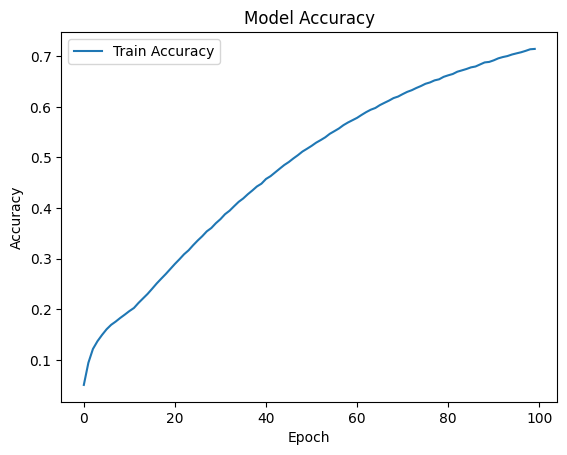

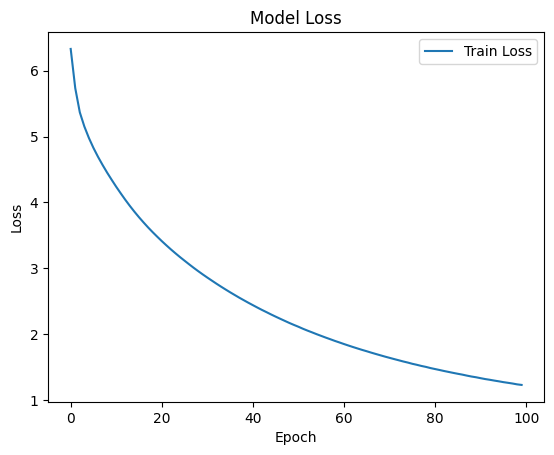

In [ ]:
# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


**6. Next Word Prediction Function**

In [ ]:
def predict_next_word(seed_text, n_words=10):
    for _ in range(n_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len - 1, padding='pre')
        predicted = np.argmax(model.predict(token_list), axis=-1)[0]
        output_word = tokenizer.index_word.get(predicted, '')
        seed_text += " " + output_word
    return seed_text


**7. Example Usage**

In [ ]:
print(predict_next_word("it is a truth universally", n_words=10))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
it is a truth universally acknowledged that a single man in possession of the neighbourhood


In [ ]:
model.save("lstm_model.h5")

**⚙️ 8. Define & Train GRU Model**

let's try and see if the accuracy improve

In [ ]:
# Build GRU model
gru_model = Sequential([
    Embedding(total_words, 100, input_length=max_sequence_len-1),
    GRU(150),
    Dense(total_words, activation='softmax')
])
gru_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train GRU
gru_history = gru_model.fit(X, y, epochs=100, batch_size=128,
                            callbacks=[EarlyStopping(monitor='loss', patience=5)])


Epoch 1/100
925/925 ━━━━━━━━━━━━━━━━━━━━ 117s 122ms/step - accuracy: 0.0423 - loss: 6.6174
Epoch 2/100
925/925 ━━━━━━━━━━━━━━━━━━━━ 143s 123ms/step - accuracy: 0.1084 - loss: 5.5450
Epoch 3/100
925/925 ━━━━━━━━━━━━━━━━━━━━ 139s 120ms/step - accuracy: 0.1365 - loss: 5.1312
Epoch 4/100
925/925 ━━━━━━━━━━━━━━━━━━━━ 141s 119ms/step - accuracy: 0.1580 - loss: 4.8438
Epoch 5/100
925/925 ━━━━━━━━━━━━━━━━━━━━ 113s 122ms/step - accuracy: 0.1740 - loss: 4.5943
Epoch 6/100
925/925 ━━━━━━━━━━━━━━━━━━━━ 138s 118ms/step - accuracy: 0.1892 - loss: 4.3677
Epoch 7/100
925/925 ━━━━━━━━━━━━━━━━━━━━ 144s 120ms/step - accuracy: 0.2077 - loss: 4.1383
Epoch 8/100
925/925 ━━━━━━━━━━━━━━━━━━━━ 141s 119ms/step - accuracy: 0.2261 - loss: 3.9553
Epoch 9/100
925/925 ━━━━━━━━━━━━━━━━━━━━ 141s 119ms/step - accuracy: 0.2470 - loss: 3.7770
Epoch 10/100
925/925 ━━━━━━━━━━━━━━━━━━━━ 142s 118ms/step - accuracy: 0.2699 - loss: 3.6150
Epoch 11/100
925/925 ━━━━━━━━━━━━━━━━━━━━ 109s 118ms/step - accuracy: 0.2926 - loss: 3.45